<a href="https://colab.research.google.com/github/toyo97/rgbd-domain-adaptation/blob/master/Visualization%20of%20results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import time
import os
from getpass import getpass
import pickle
import matplotlib.pyplot as plt
import numpy as np

**Reimport a module (debug purpose)**

In [ ]:
import importlib
importlib.reload(os)

<module 'os' from '/usr/lib/python3.6/os.py'>

# File loading
Get obj files for the plots

In [8]:
since = time.time()
!apt install subversion
!svn checkout https://github.com/toyo97/rgbd-domain-adaptation/trunk/results

time_elapsed = time.time() - since
print('Time to load objects: {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Checked out revision 243.
Time to load objects: 0m 9s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Best configuration found so far: {'gamma': 0.3, 'lr': 0.0024420530945486497, 'step_size': 7} accuracy: 0.5762717083384653 epoch: 1


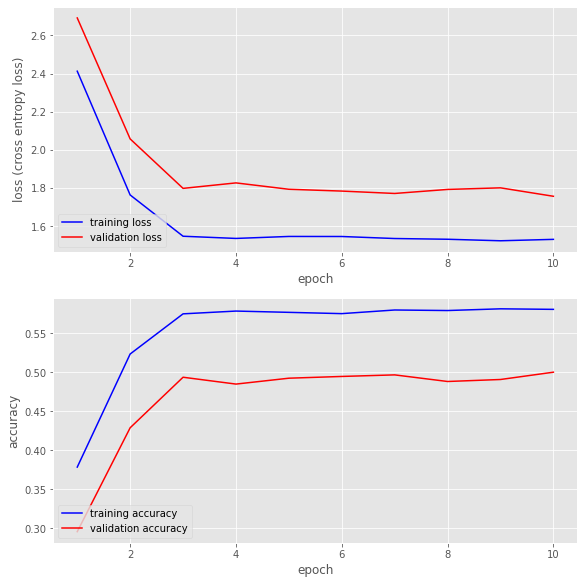

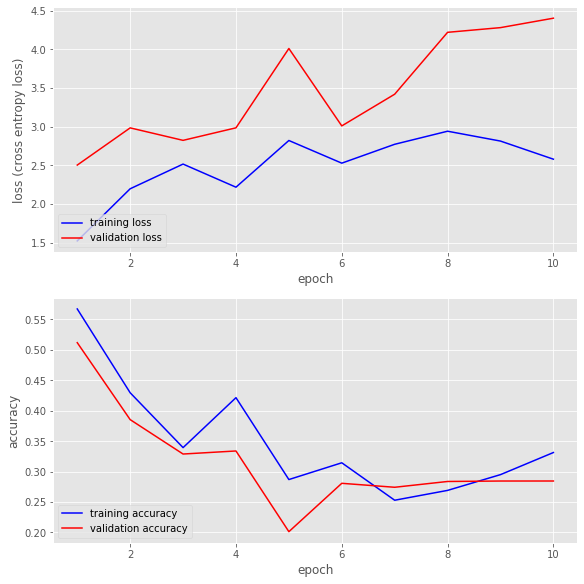

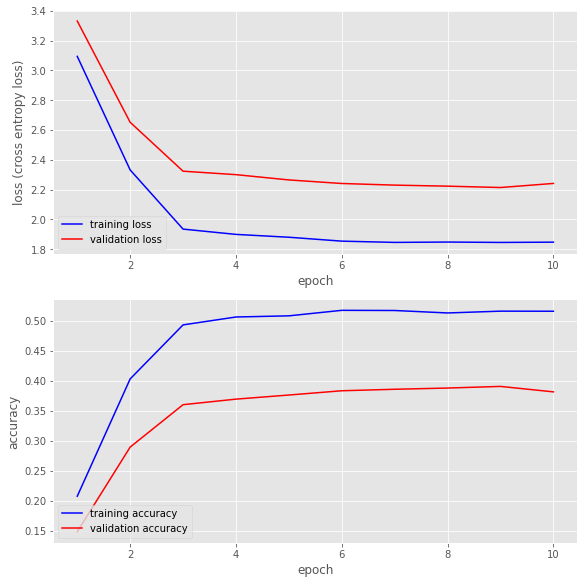

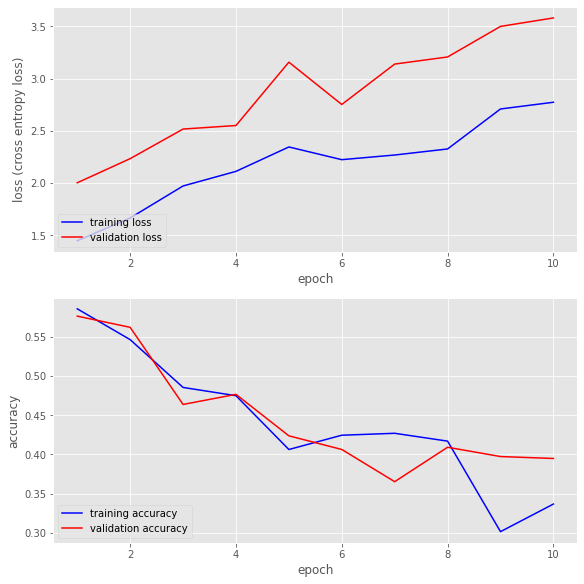

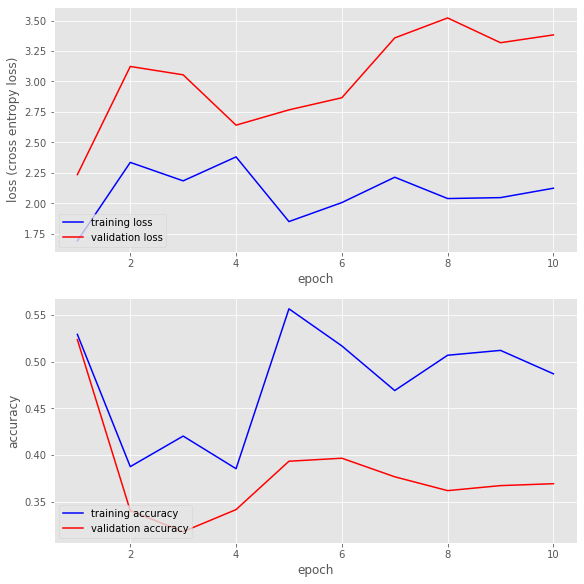

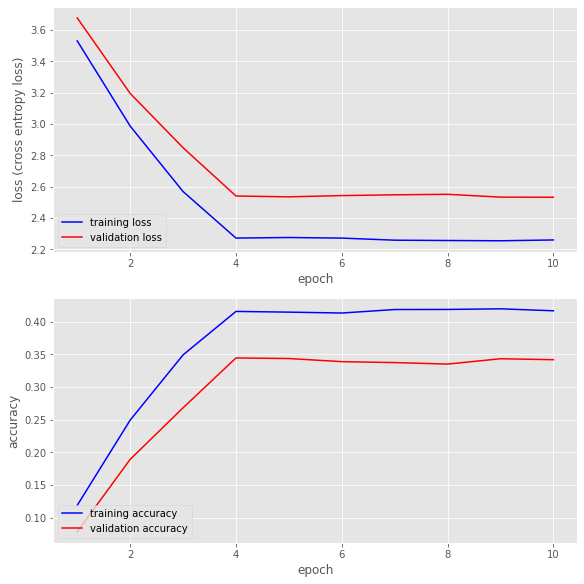

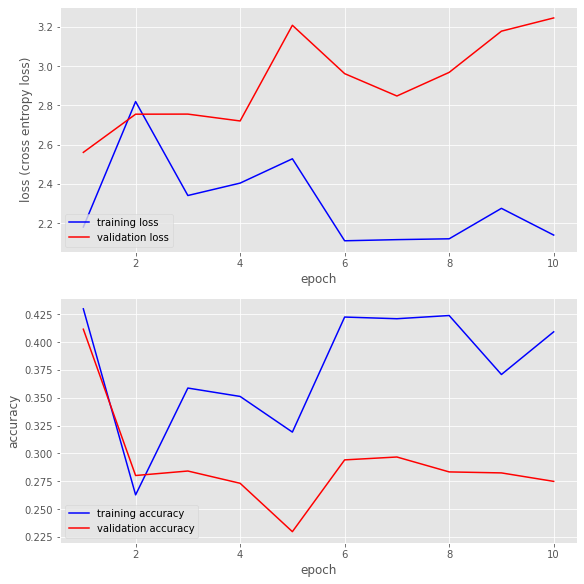

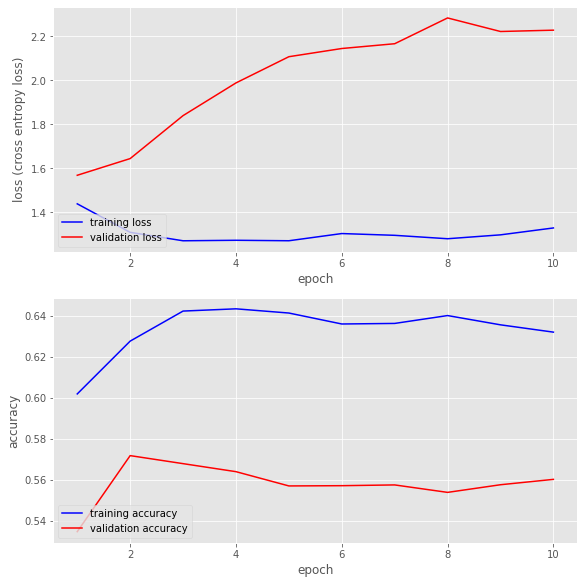

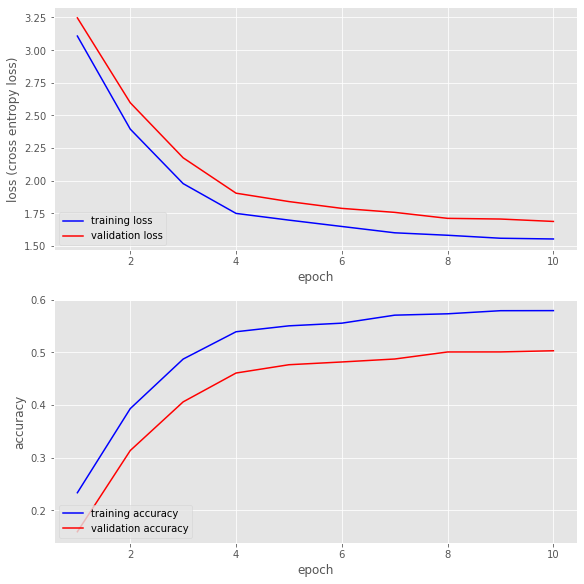

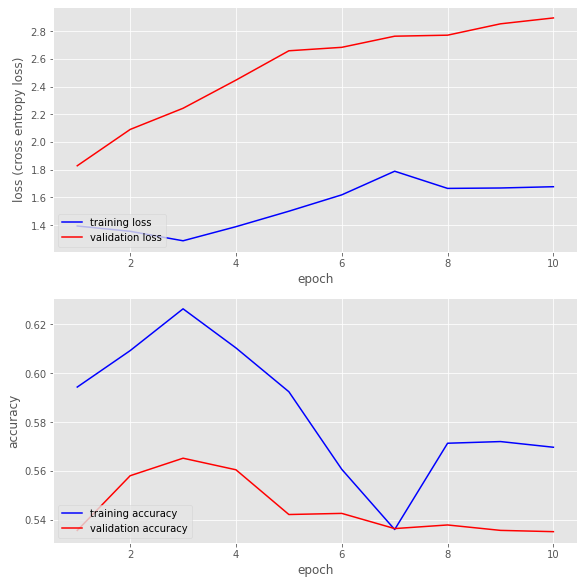

In [7]:
ROOT = "results/tuning"
directory_visualized = "only_SAFN/e2e/LR_stepsize_gamma"
plt.style.use('ggplot')
best_acc = 0
best_epoch = 0
run_to_save = -1
best_params = {}
for i,file in enumerate(os.listdir(os.path.join(ROOT,directory_visualized))):
  if os.path.isfile(os.path.join(ROOT,directory_visualized,file)):
    with open(os.path.join(ROOT,directory_visualized,file), "rb") as f:
      x = pickle.load(f)
      if "params" in x:
        params = x["params"]
      elif "wd" in x:
        params = x["wd"]
      else:
        params = None

      train_losses, val_losses, train_accs, val_accs = x["results"]

      best_acc_temp = max(val_accs)
      best_epoch_temp = np.argmax(val_accs) + 1

      if best_acc < best_acc_temp:
          best_acc = best_acc_temp
          best_epoch = best_epoch_temp
          best_params = params

      #print graph
      X = np.linspace(1, len(train_losses), len(train_losses))
      fig, axs = plt.subplots(2,1, constrained_layout=True, figsize=(8,8))
      #fig.suptitle(params, fontsize=16)

      axs[0].plot(X, train_losses, "b", label="training loss")
      axs[0].plot(X, val_losses, "r", label="validation loss")
      axs[1].plot(X, train_accs,"b", label="training accuracy")
      axs[1].plot(X, val_accs, "r", label="validation accuracy")

      axs[0].set_xlabel("epoch")
      axs[0].set_ylabel("loss (cross entropy loss)")
      axs[0].legend(loc='lower left')
      axs[1].set_xlabel("epoch")
      axs[1].set_ylabel("accuracy")
      axs[1].legend(loc='lower left')

      if i==run_to_save:
        fig.savefig("depth_used.eps", format="eps")

print("Best configuration found so far: {} accuracy: {} epoch: {}".format(best_params, best_acc, best_epoch))

Best result obtained so far: {'gamma': 0.3, 'lr': 0.0005179474679231213, 'step_size': 3} accuracy: 0.5791353614977214 epoch: 2
Average result obtained: 0.5565402143121074 standard deviation: 0.02125088893518903


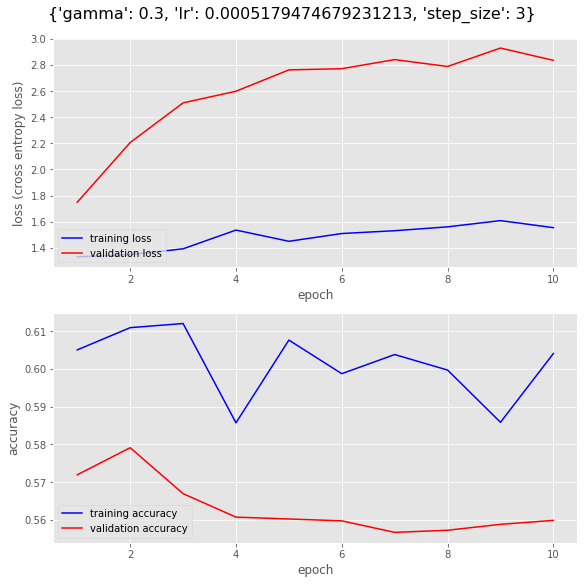

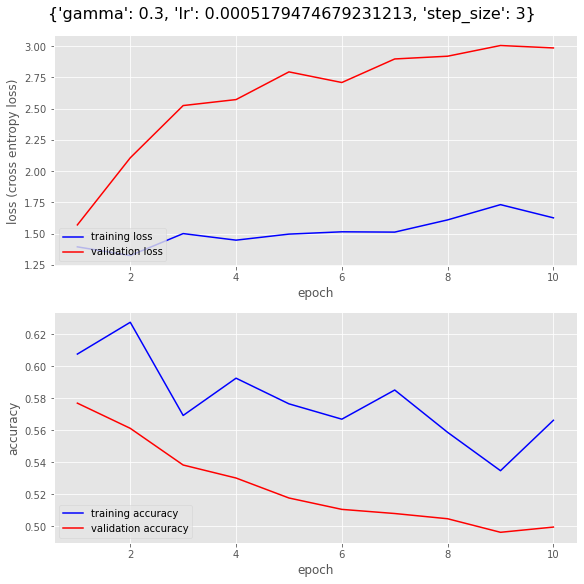

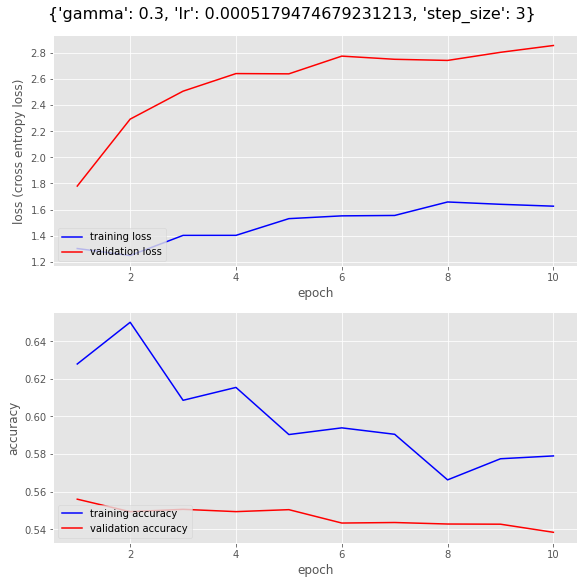

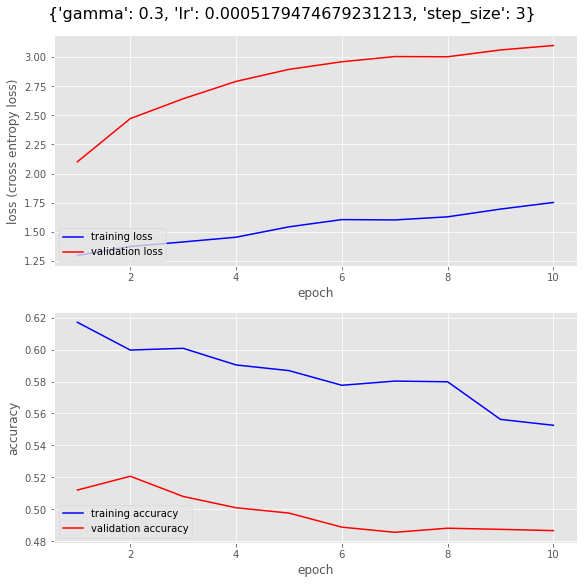

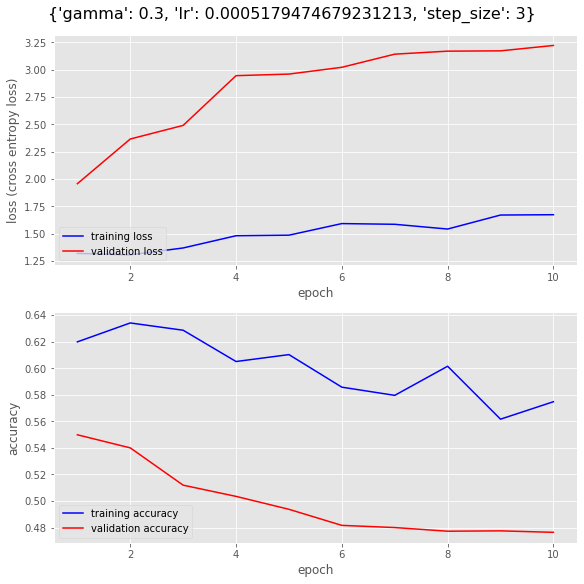

In [12]:
ROOT = "results/final_results/"
directory_visualized = "only_SAFN/e2e5runs/"
plt.style.use('ggplot')
best_acc = 0
best_epoch = 0
acc = []
for file in os.listdir(os.path.join(ROOT,directory_visualized)):
  if os.path.isfile(os.path.join(ROOT,directory_visualized,file)):
    with open(os.path.join(ROOT,directory_visualized,file), "rb") as f:
      x = pickle.load(f)
      if "params" in x:
        params = x["params"]
      elif "wd" in x:
        params = x["wd"]
      else:
        params = None

      train_losses, val_losses, train_accs, val_accs = x["results"]

      best_acc_temp = max(val_accs)
      best_epoch_temp = np.argmax(val_accs) + 1
      acc.append(best_acc_temp)

      if best_acc < best_acc_temp:
          best_acc = best_acc_temp
          best_epoch = best_epoch_temp


      #print graph
      X = np.linspace(1, len(train_losses), len(train_losses))
      fig, axs = plt.subplots(2,1, constrained_layout=True, figsize=(8,8))
      fig.suptitle(params, fontsize=16)

      axs[0].plot(X, train_losses, "b", label="training loss")
      axs[0].plot(X, val_losses, "r", label="validation loss")
      axs[1].plot(X, train_accs,"b", label="training accuracy")
      axs[1].plot(X, val_accs, "r", label="validation accuracy")

      axs[0].set_xlabel("epoch")
      axs[0].set_ylabel("loss (cross entropy loss)")
      axs[0].legend(loc='lower left')
      axs[1].set_xlabel("epoch")
      axs[1].set_ylabel("accuracy")
      axs[1].legend(loc='lower left')

print("Best result obtained so far: {} accuracy: {} epoch: {}".format(params, best_acc, best_epoch))
print("Average result obtained: {} standard deviation: {}".format(np.average(acc), np.std(acc)))
